In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

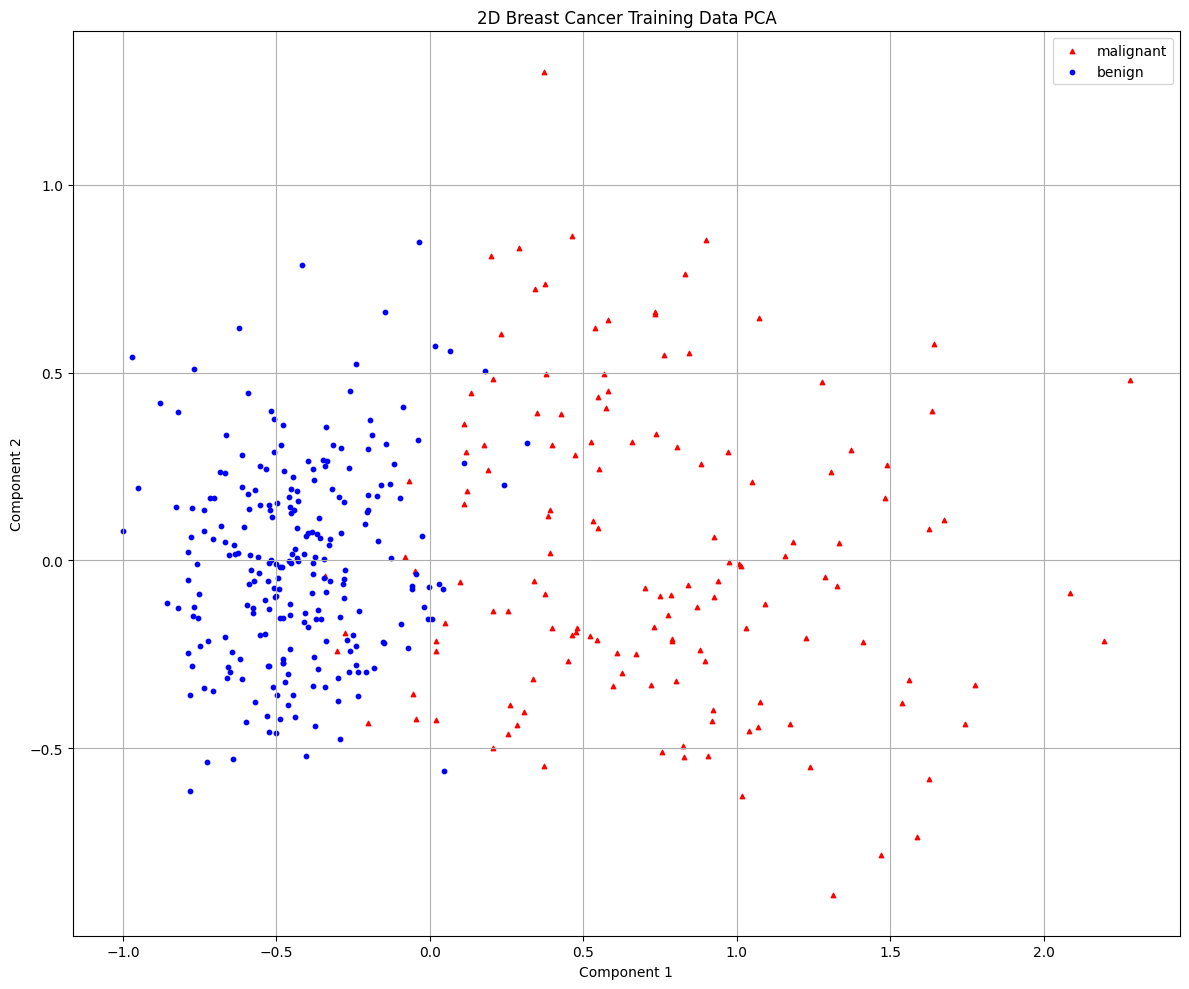

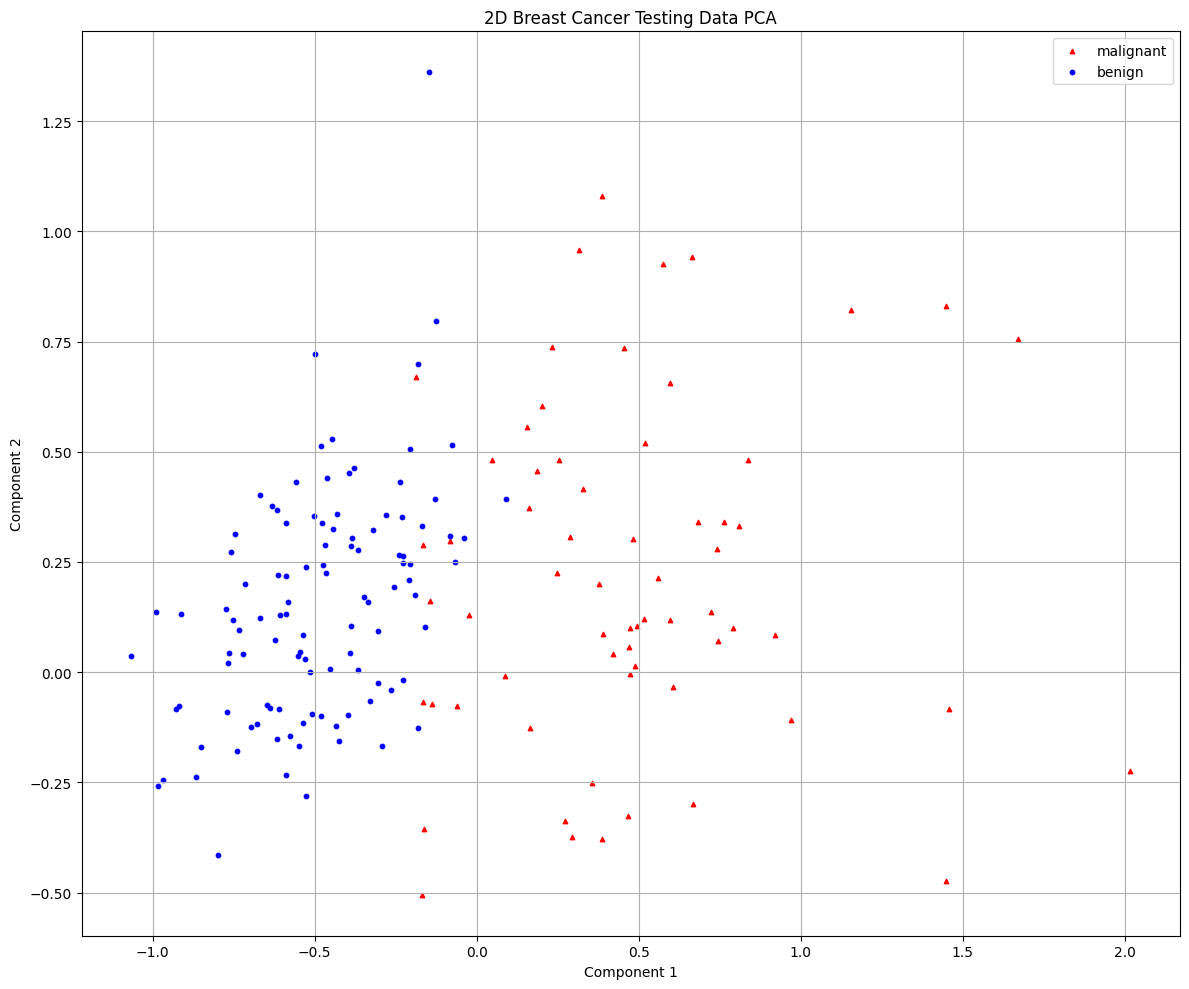

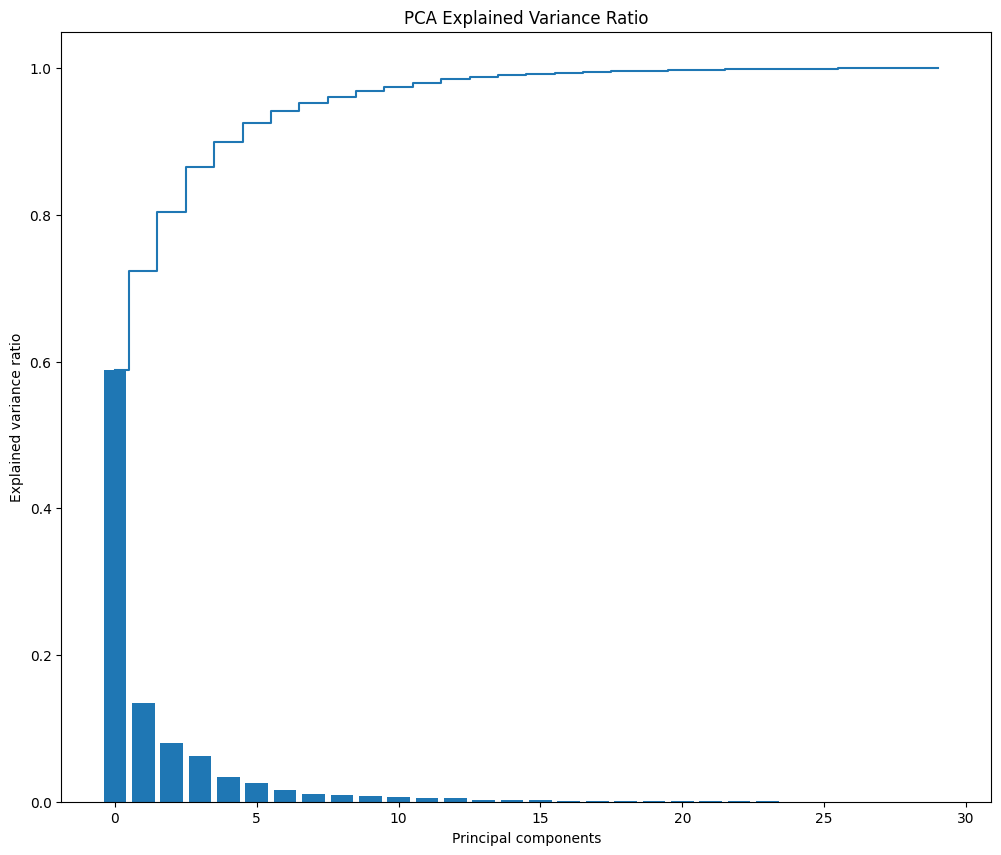

In [2]:
outlier_params = {'n_neighbors': 20}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'loc', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {})

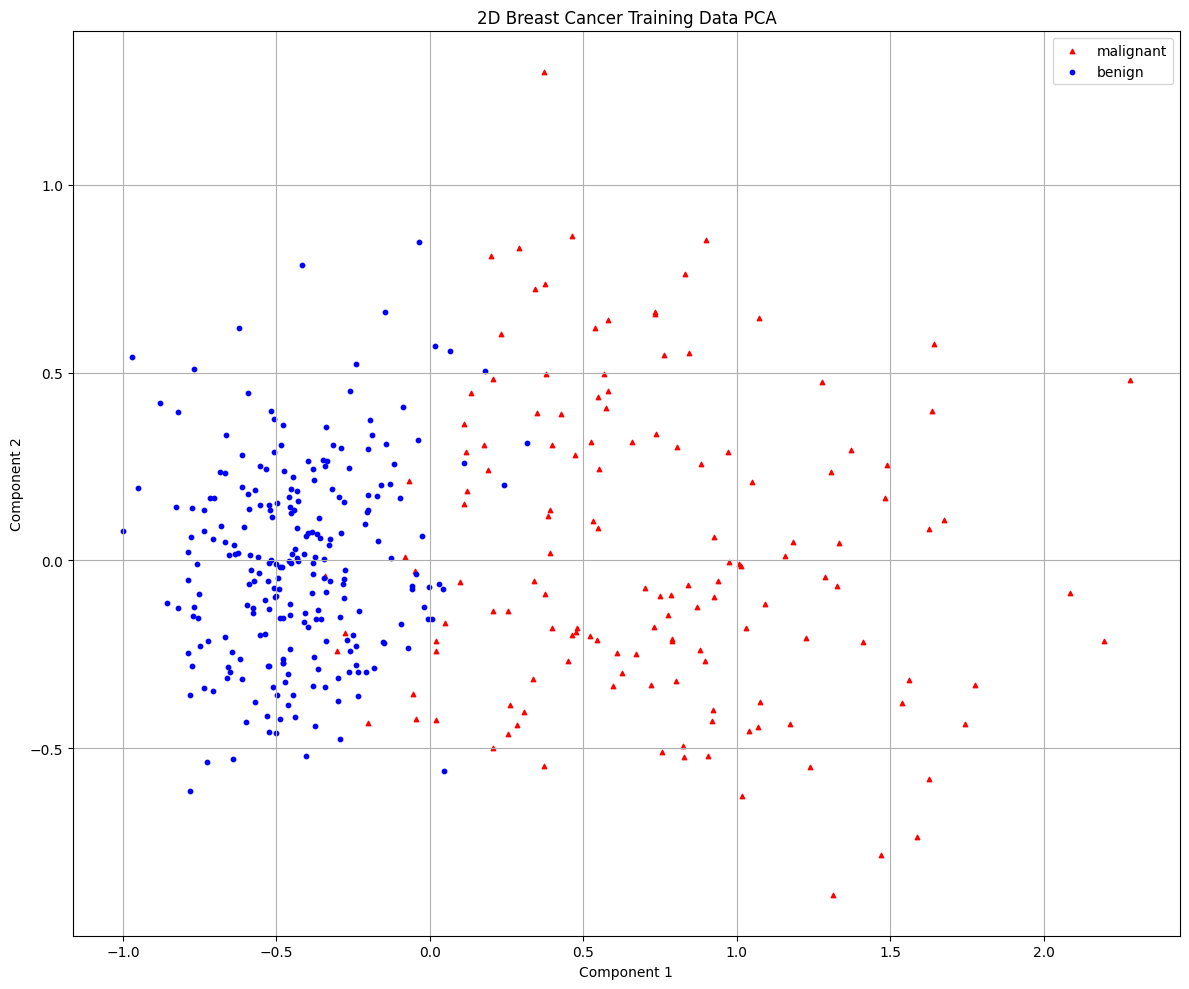

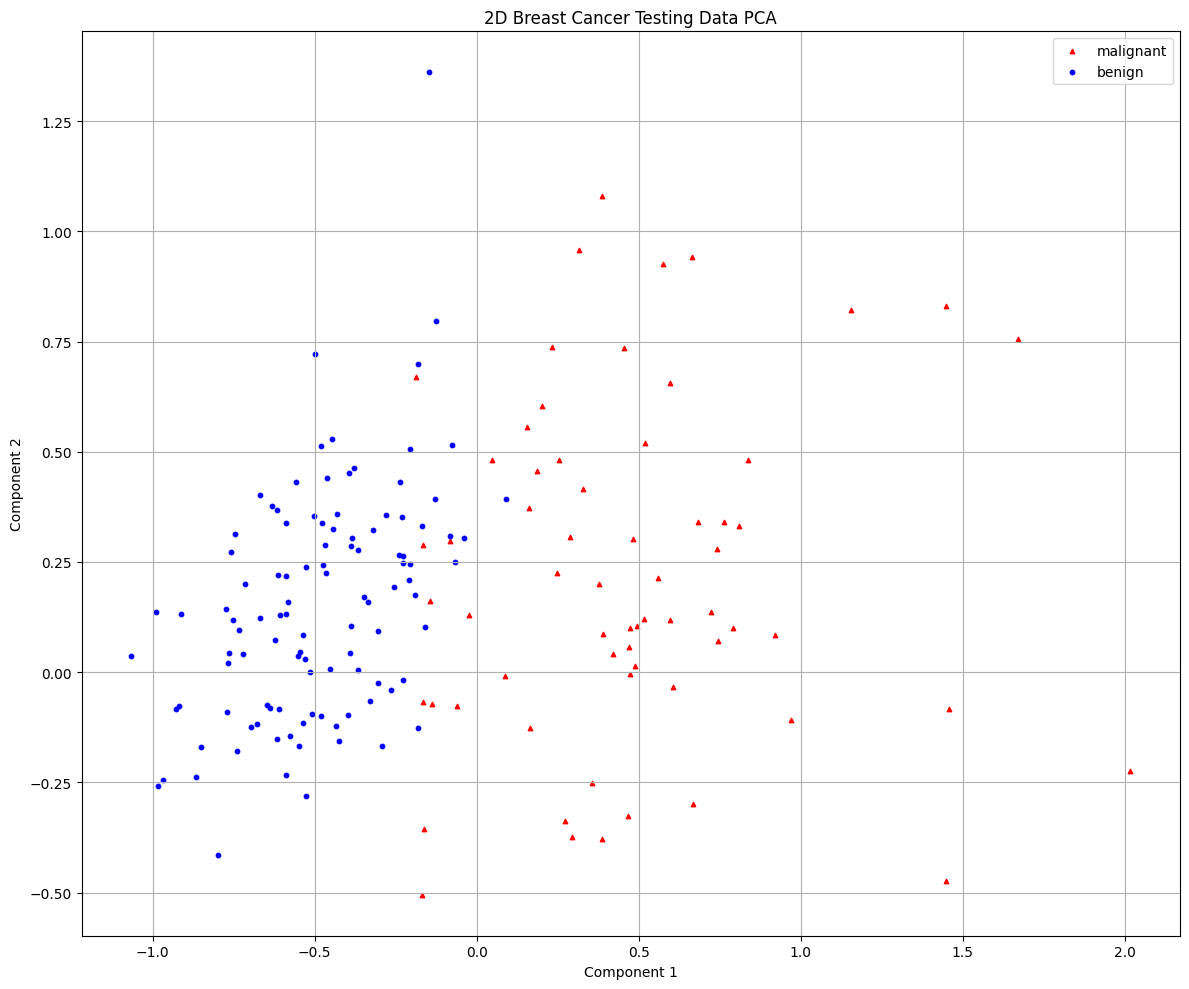

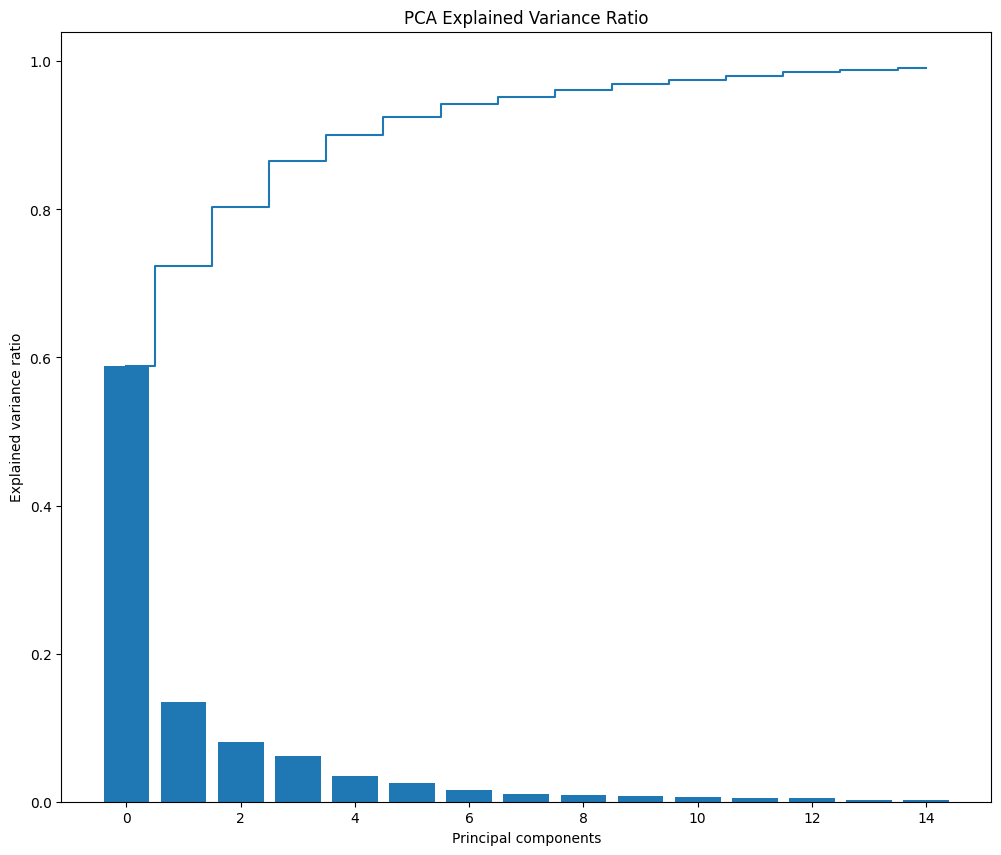

[I 2025-04-27 06:23:03,989] A new study created in memory with name: no-name-c68dc7d5-5f50-4224-bc4a-6b4fa9fb1368
[I 2025-04-27 06:23:24,346] Trial 0 finished with value: 0.9605263157894737 and parameters: {'n_estimators': 1917, 'learning_rate': 0.03255279575779277, 'num_leaves': 42, 'max_depth': 7, 'min_child_samples': 53, 'subsample': 0.5104162133269095, 'colsample_bytree': 0.9953526522753461, 'reg_alpha': 4.4559469080215315e-05, 'reg_lambda': 2.426731236076588}. Best is trial 0 with value: 0.9605263157894737.
[I 2025-04-27 06:28:51,782] Trial 1 finished with value: 0.9578947368421054 and parameters: {'n_estimators': 9349, 'learning_rate': 0.0012470753628592054, 'num_leaves': 37, 'max_depth': 7, 'min_child_samples': 53, 'subsample': 0.4439852414112515, 'colsample_bytree': 0.5990947128702875, 'reg_alpha': 0.03531131253921854, 'reg_lambda': 4.3389942811661525e-06}. Best is trial 0 with value: 0.9605263157894737.
[I 2025-04-27 06:28:58,137] Trial 2 finished with value: 0.957894736842105

Best trial:
Accuracy: 0.9710526315789474
Best hyperparameters:  {'n_estimators': 4604, 'learning_rate': 0.014812630609156321, 'num_leaves': 82, 'max_depth': 5, 'min_child_samples': 94, 'subsample': 0.7742605964858201, 'colsample_bytree': 0.4896732328251716, 'reg_alpha': 0.0008636285891252805, 'reg_lambda': 9.732047669826978e-07}


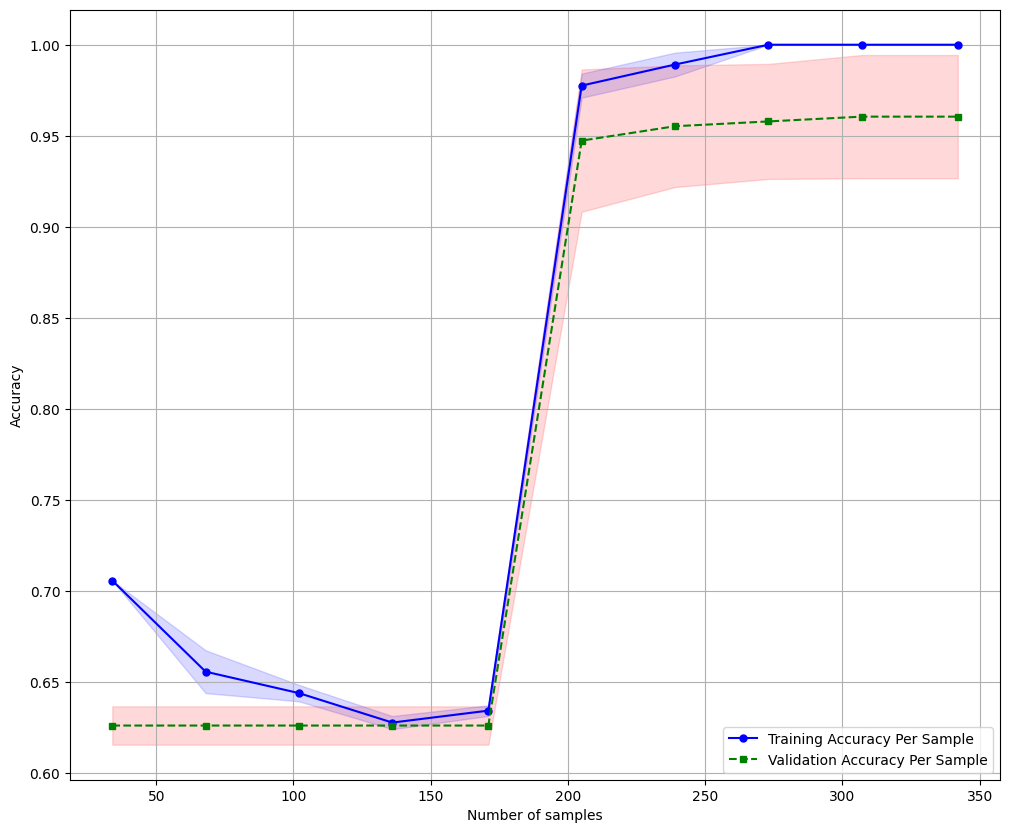

Confusion Matrix
[[ 55   9]
 [  0 107]]
Accuracy: 0.9474, Precision: 0.9224, Recall: 1.0000, F1: 0.9596, AUC: 0.9917


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {'n_components': 15})
helper.train_and_evaluate_model('lgbm', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)